# **Delay Predictors from Aviation Data**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('C:Datasets/Airline_Delay_Cause.csv')

In [3]:
df.head()

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,...,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,2023,8,9E,Endeavor Air Inc.,ABE,"Allentown/Bethlehem/Easton, PA: Lehigh Valley ...",89.0,13.0,2.25,1.60,...,0.0,5.99,2.0,1.0,1375.0,71.0,761.0,118.0,0.0,425.0
1,2023,8,9E,Endeavor Air Inc.,ABY,"Albany, GA: Southwest Georgia Regional",62.0,10.0,1.97,0.04,...,0.0,7.42,0.0,1.0,799.0,218.0,1.0,62.0,0.0,518.0
2,2023,8,9E,Endeavor Air Inc.,AEX,"Alexandria, LA: Alexandria International",62.0,10.0,2.73,1.18,...,0.0,4.28,1.0,0.0,766.0,56.0,188.0,78.0,0.0,444.0
3,2023,8,9E,Endeavor Air Inc.,AGS,"Augusta, GA: Augusta Regional at Bush Field",66.0,12.0,3.69,2.27,...,0.0,1.57,1.0,1.0,1397.0,471.0,320.0,388.0,0.0,218.0
4,2023,8,9E,Endeavor Air Inc.,ALB,"Albany, NY: Albany International",92.0,22.0,7.76,0.00,...,0.0,11.28,2.0,0.0,1530.0,628.0,0.0,134.0,0.0,768.0


In [4]:
df.shape

(171666, 21)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171666 entries, 0 to 171665
Data columns (total 21 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   year                 171666 non-null  int64  
 1   month                171666 non-null  int64  
 2   carrier              171666 non-null  object 
 3   carrier_name         171666 non-null  object 
 4   airport              171666 non-null  object 
 5   airport_name         171666 non-null  object 
 6   arr_flights          171426 non-null  float64
 7   arr_del15            171223 non-null  float64
 8   carrier_ct           171426 non-null  float64
 9   weather_ct           171426 non-null  float64
 10  nas_ct               171426 non-null  float64
 11  security_ct          171426 non-null  float64
 12  late_aircraft_ct     171426 non-null  float64
 13  arr_cancelled        171426 non-null  float64
 14  arr_diverted         171426 non-null  float64
 15  arr_delay        

In [6]:
df.isna().sum()

year                     0
month                    0
carrier                  0
carrier_name             0
airport                  0
airport_name             0
arr_flights            240
arr_del15              443
carrier_ct             240
weather_ct             240
nas_ct                 240
security_ct            240
late_aircraft_ct       240
arr_cancelled          240
arr_diverted           240
arr_delay              240
carrier_delay          240
weather_delay          240
nas_delay              240
security_delay         240
late_aircraft_delay    240
dtype: int64

In [7]:
df.describe()

,year,month,arr_flights,arr_del15,carrier_ct,weather_ct,nas_ct,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
count,171666.000000,171666.000000,171426.000000,171223.000000,171426.000000,171426.000000,171426.000000,171426.000000,171426.000000,171426.000000,171426.000000,171426.00000,171426.000000,171426.000000,171426.000000,171426.000000,171426.000000
mean,2018.551361,6.493633,362.528467,66.434387,20.796615,2.250347,19.381147,0.157096,23.770554,7.530497,0.863387,4239.48733,1437.185124,222.563497,920.651704,7.382725,1651.700063
std,2.890006,3.440908,992.894662,179.540694,50.315176,7.314252,61.675244,0.717405,72.393477,43.654880,3.772853,12618.56605,4215.677812,821.086511,3423.509335,41.779985,5221.878385
min,2013.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2016.000000,4.000000,50.000000,6.000000,2.160000,0.000000,1.000000,0.000000,1.230000,0.000000,0.000000,335.00000,110.000000,0.000000,34.000000,0.000000,65.000000
50%,2019.000000,7.000000,100.000000,17.000000,6.400000,0.400000,3.910000,0.000000,5.000000,1.000000,0.000000,1018.00000,375.000000,18.000000,146.000000,0.000000,320.000000
75%,2021.000000,9.000000,250.000000,47.000000,17.260000,1.860000,11.710000,0.000000,15.260000,4.000000,1.000000,2884.00000,1109.000000,146.000000,477.000000,0.000000,1070.000000
max,2023.000000,12.000000,21977.000000,4176.000000,1293.910000,266.420000,1884.420000,58.690000,2069.070000,4951.000000,197.000000,438783.00000,196944.000000,31960.000000,112018.000000,3760.000000,227959.000000


# EDA

In [8]:
# Minimal NA handling – drop rows with missing core values
core_cols = [
"arr_flights", "arr_del15",
"carrier_delay", "weather_delay", "nas_delay", "security_delay", "late_aircraft_delay",
"carrier_ct", "weather_ct", "nas_ct", "security_ct", "late_aircraft_ct",
]

In [9]:
raw_len = len(df)
df = df.dropna(subset=["arr_flights"])

In [10]:
# For other missing values, fill with 0 (conservative; avoids losing rows)
fill_zero_cols = [c for c in core_cols if c != "arr_flights"]
df[fill_zero_cols] = df[fill_zero_cols].fillna(0)

In [11]:
# - delay_rate: share of arrivals delayed >15 min
# - total_delay_min: total delay minutes across causes
# - cause shares: minutes by cause / total

df["delay_rate"] = np.where(df["arr_flights"] > 0, df["arr_del15"] / df["arr_flights"], np.nan)
delay_min_cols = ["carrier_delay", "weather_delay", "nas_delay", "security_delay", "late_aircraft_delay"]
df["total_delay_min"] = df[delay_min_cols].sum(axis=1)
for c in delay_min_cols:
    share_col = f"{c}_share"
    df[share_col] = np.where(df["total_delay_min"] > 0, df[c] / df["total_delay_min"], 0)

In [12]:
# Timestamp from year + month (day=1)
df["date"] = pd.to_datetime(dict(year=df["year"], month=df["month"], day=1))

In [13]:
print(f"Loaded {raw_len} rows; after light cleaning: {len(df)} rows.")

Loaded 171666 rows; after light cleaning: 171426 rows.


In [14]:
# 1) Delay distribution by cause
print("\n1. Delay distribution by cause – total minutes & percentages\n")

cause_totals = df[delay_min_cols].sum().sort_values(ascending=False)
cause_perc = (cause_totals / cause_totals.sum()).rename("share")

summary_cause = (pd.concat([cause_totals.rename("total_minutes"), cause_perc], axis=1).sort_values("total_minutes", ascending=False))
print(summary_cause)


1. Delay distribution by cause – total minutes & percentages

                     total_minutes     share
late_aircraft_delay    283144335.0  0.389599
carrier_delay          246370897.0  0.339000
nas_delay              157823639.0  0.217161
weather_delay           38153170.0  0.052498
security_delay           1265591.0  0.001741


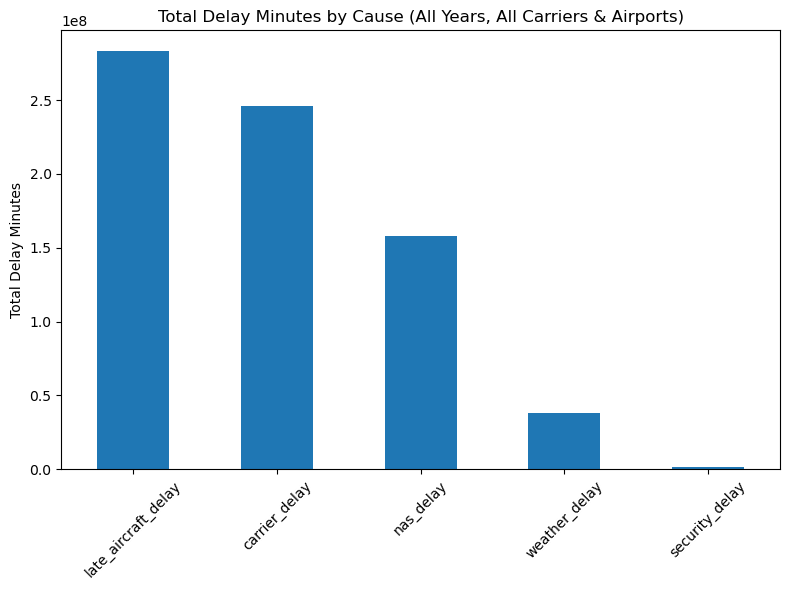

In [15]:
# Bar chart – total delay minutes by cause
plt.figure(figsize=(8, 6))
cause_totals.plot(kind="bar")
plt.title("Total Delay Minutes by Cause (All Years, All Carriers & Airports)")
plt.ylabel("Total Delay Minutes")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [16]:
# 2) Trends by year & month (seasonality)
print("\n2. Trends by year & month – delay minutes and delay rate\n")

# Yearly trends
yearly = (df.groupby("year").agg(arr_flights=("arr_flights", "sum"),arr_del15=("arr_del15", "sum"),total_delay_min=("total_delay_min", "sum"),))
yearly["delay_rate"] = np.where(yearly["arr_flights"] > 0, yearly["arr_del15"] / yearly["arr_flights"], np.nan)
print("Yearly summary:\n", yearly)


2. Trends by year & month – delay minutes and delay rate

Yearly summary:
       arr_flights  arr_del15  total_delay_min  delay_rate
year                                                     
2013    2629106.0   493432.0       26106070.0    0.187681
2014    5819811.0  1240528.0       70316961.0    0.213156
2015    5819079.0  1063439.0       62651867.0    0.182750
2016    5617658.0   964239.0       59850360.0    0.171644
2017    5674621.0  1029474.0       65816488.0    0.181417
2018    7206195.0  1352165.0       87498074.0    0.187639
2019    7422037.0  1389253.0       95889721.0    0.187179
2020    4688354.0   431921.0       26909441.0    0.092126
2021    5995397.0  1010332.0       66613291.0    0.168518
2022    6729125.0  1376798.0       92635169.0    0.204603
2023    4545422.0  1023514.0       72470190.0    0.225175


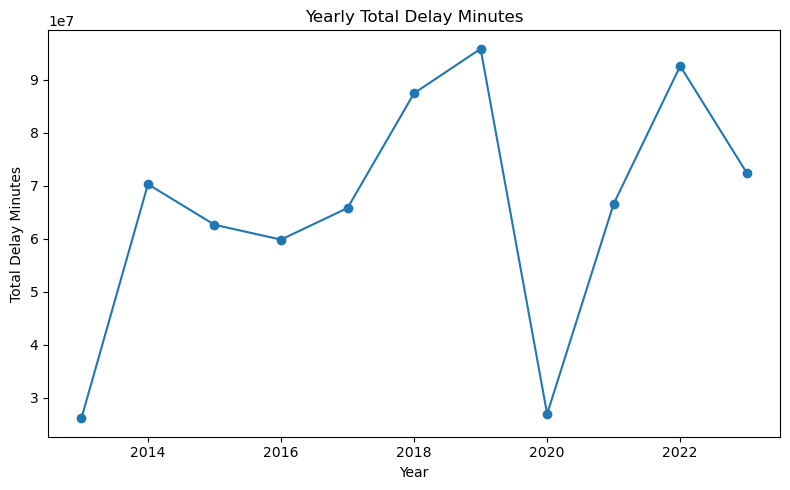

In [17]:
# Plot yearly delay minutes
plt.figure(figsize=(8, 5))
yearly["total_delay_min"].plot(marker="o")
plt.title("Yearly Total Delay Minutes")
plt.xlabel("Year")
plt.ylabel("Total Delay Minutes")
plt.tight_layout()
plt.show()

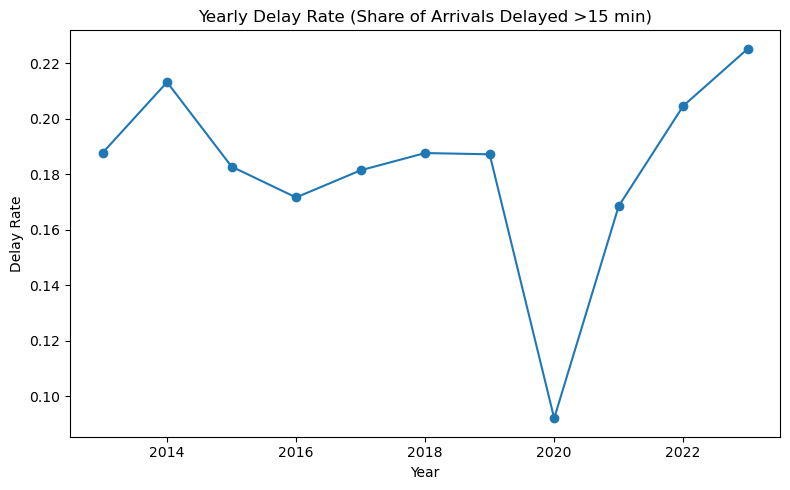

In [18]:
# Plot yearly delay rate
plt.figure(figsize=(8, 5))
yearly["delay_rate"].plot(marker="o")
plt.title("Yearly Delay Rate (Share of Arrivals Delayed >15 min)")
plt.xlabel("Year")
plt.ylabel("Delay Rate")
plt.tight_layout()
plt.show()

In [19]:
# Monthly seasonality (across all years): average by calendar month
monthly = (df.groupby("month").agg(arr_flights=("arr_flights", "sum"),arr_del15=("arr_del15", "sum"),total_delay_min=("total_delay_min", "sum"),))
monthly["delay_rate"] = np.where(monthly["arr_flights"] > 0, monthly["arr_del15"] / monthly["arr_flights"], np.nan)
print("\nMonthly seasonality (calendar month across years):\n\n", monthly)


Monthly seasonality (calendar month across years):

        arr_flights  arr_del15  total_delay_min  delay_rate
month                                                     
1        5037397.0   918519.0       59505501.0    0.182340
2        4653341.0   855134.0       54782130.0    0.183768
3        5457777.0   928208.0       56283556.0    0.170071
4        4988672.0   848691.0       54493614.0    0.170124
5        5050013.0   907663.0       58248429.0    0.179735
6        5175726.0  1173371.0       79834292.0    0.226707
7        5490440.0  1204979.0       83779210.0    0.219469
8        6034001.0  1209494.0       79870798.0    0.200446
9        4969482.0   703938.0       42227639.0    0.141652
10       5206266.0   792054.0       46199426.0    0.152135
11       4985442.0   751540.0       43768680.0    0.150747
12       5098248.0  1081504.0       67764357.0    0.212132


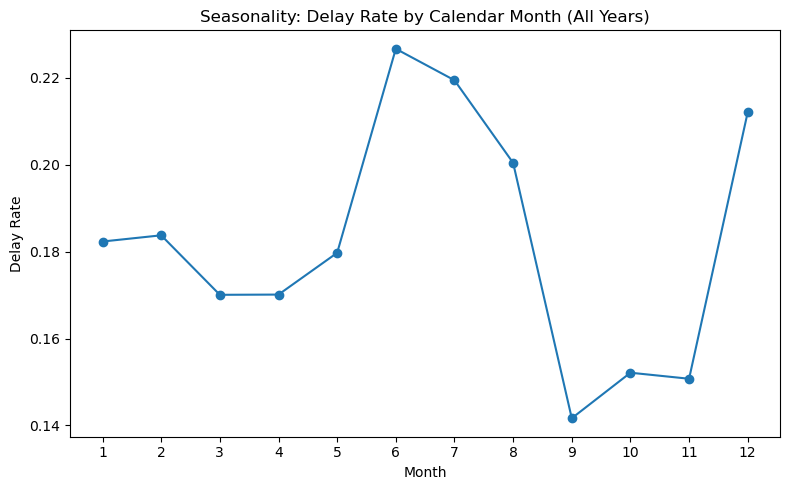

In [20]:
plt.figure(figsize=(8, 5))
monthly["delay_rate"].plot(marker="o")
plt.title("Seasonality: Delay Rate by Calendar Month (All Years)")
plt.xlabel("Month")
plt.ylabel("Delay Rate")
plt.xticks(range(1,13))
plt.tight_layout()
plt.show()

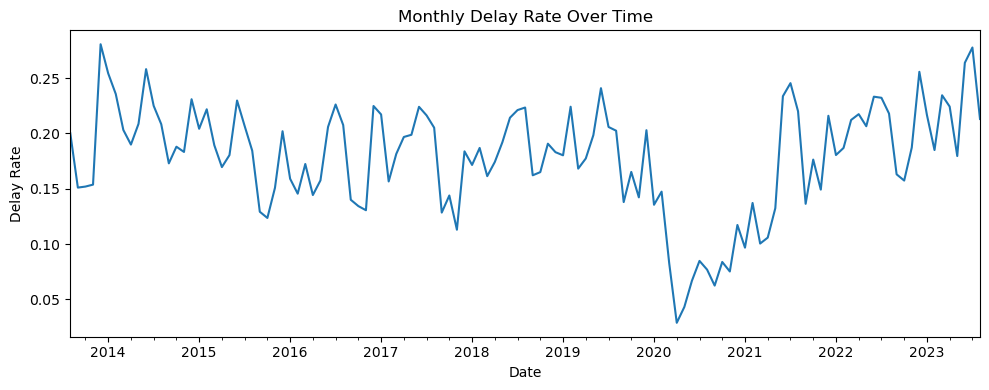

In [21]:
# Full timeseries by month-year
ts = (
df.sort_values("date")
.groupby("date")
.agg(arr_flights=("arr_flights", "sum"), arr_del15=("arr_del15", "sum"), total_delay_min=("total_delay_min", "sum"))
)
ts["delay_rate"] = np.where(ts["arr_flights"] > 0, ts["arr_del15"] / ts["arr_flights"], np.nan)


plt.figure(figsize=(10, 4))
ts["delay_rate"].plot()
plt.title("Monthly Delay Rate Over Time")
plt.xlabel("Date")
plt.ylabel("Delay Rate")
plt.tight_layout()
plt.show()

In [22]:
# 3) Airline-level analysis (carriers)
print("\n3. Airline-level analysis – carriers most delay-prone\n")

carrier_grp = (
df.groupby(["carrier", "carrier_name"]).agg(
arr_flights=("arr_flights", "sum"),
arr_del15=("arr_del15", "sum"),
total_delay_min=("total_delay_min", "sum"),
carrier_delay=("carrier_delay", "sum"),
weather_delay=("weather_delay", "sum"),
nas_delay=("nas_delay", "sum"),
security_delay=("security_delay", "sum"),
late_aircraft_delay=("late_aircraft_delay", "sum"),
)
).reset_index()
carrier_grp


3. Airline-level analysis – carriers most delay-prone



,carrier,carrier_name,arr_flights,arr_del15,total_delay_min,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,9E,Endeavor Air Inc.,1466178.0,200559.0,15067873.0,4714122.0,1134690.0,3790300.0,7232.0,5421529.0
1,AA,American Airlines Inc.,7973061.0,1538261.0,103761183.0,36455506.0,5315301.0,20797721.0,212423.0,40980232.0
2,AS,Alaska Airlines Inc.,1990957.0,317730.0,15640396.0,4733484.0,557206.0,4983380.0,87646.0,5278680.0
3,B6,JetBlue Airways,2609697.0,647919.0,46001696.0,16264717.0,1336605.0,10278881.0,114077.0,18007416.0
4,DL,Delta Air Lines Inc.,8661561.0,1198884.0,79046919.0,33233035.0,5260651.0,18286679.0,90327.0,22176227.0
5,EV,ExpressJet Airlines Inc.,2637669.0,540578.0,37500819.0,12897875.0,923075.0,9353512.0,4906.0,14321451.0
6,EV,ExpressJet Airlines LLC,149234.0,29672.0,2487859.0,761681.0,101006.0,927317.0,0.0,697855.0
7,F9,Frontier Airlines Inc.,1158943.0,291403.0,20351725.0,5680841.0,402423.0,5101309.0,0.0,9167152.0
8,FL,AirTran Airways Corporation,143429.0,25226.0,1202869.0,311049.0,29697.0,301256.0,0.0,560867.0
9,G4,Allegiant Air,613357.0,149943.0,10837875.0,3548382.0,782536.0,1967267.0,38668.0,4501022.0


In [23]:
carrier_grp["delay_rate"] = np.where(carrier_grp["arr_flights"] > 0, carrier_grp["arr_del15"] / carrier_grp["arr_flights"], np.nan)

In [24]:
# Filter to carriers with meaningful traffic (e.g., >= 50k flights total)
MIN_FLIGHTS = 50_000
carrier_sig = carrier_grp[carrier_grp["arr_flights"] >= MIN_FLIGHTS].copy()

In [25]:
# Top carriers by delay rate
top_carriers_by_rate = carrier_sig.sort_values("delay_rate", ascending=False).head(15)
print("Top carriers by delay rate (min flights >= {MIN_FLIGHTS}):\n", top_carriers_by_rate[["carrier", "carrier_name", "arr_flights", "delay_rate"]])

Top carriers by delay rate (min flights >= {MIN_FLIGHTS}):
    carrier                  carrier_name  arr_flights  delay_rate
7       F9        Frontier Airlines Inc.    1158943.0    0.251439
3       B6               JetBlue Airways    2609697.0    0.248274
9       G4                 Allegiant Air     613357.0    0.244463
11      MQ  American Eagle Airlines Inc.     279283.0    0.218889
13      NK              Spirit Air Lines    1526076.0    0.216705
19      VX                Virgin America     301908.0    0.213989
5       EV      ExpressJet Airlines Inc.    2637669.0    0.204945
6       EV       ExpressJet Airlines LLC     149234.0    0.198829
20      WN        Southwest Airlines Co.   12522217.0    0.196496
1       AA        American Airlines Inc.    7973061.0    0.192932
12      MQ                     Envoy Air    2073685.0    0.190301
17      UA         United Air Lines Inc.    5464237.0    0.188634
21      YV            Mesa Airlines Inc.     914298.0    0.186001
8       FL   Air

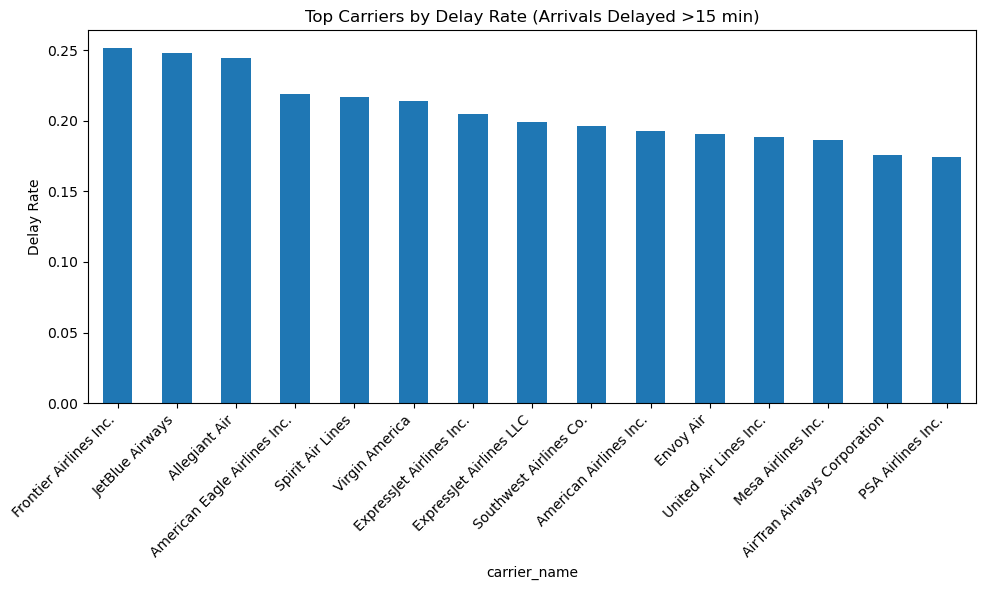

In [26]:
plt.figure(figsize=(10, 6))
(top_carriers_by_rate.set_index("carrier_name")["delay_rate"]).plot(kind="bar")
plt.title("Top Carriers by Delay Rate (Arrivals Delayed >15 min)")
plt.ylabel("Delay Rate")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


Top carriers by total delay minutes (min flights >= {MIN_FLIGHTS}):
    carrier              carrier_name  arr_flights  total_delay_min
20      WN    Southwest Airlines Co.   12522217.0      124294977.0
1       AA    American Airlines Inc.    7973061.0      103761183.0
15      OO     SkyWest Airlines Inc.    6905056.0       87077507.0
4       DL      Delta Air Lines Inc.    8661561.0       79046919.0
17      UA     United Air Lines Inc.    5464237.0       70288103.0
3       B6           JetBlue Airways    2609697.0       46001696.0
5       EV  ExpressJet Airlines Inc.    2637669.0       37500819.0
12      MQ                 Envoy Air    2073685.0       23842416.0
13      NK          Spirit Air Lines    1526076.0       22589292.0
7       F9    Frontier Airlines Inc.    1158943.0       20351725.0
22      YX          Republic Airline    1717781.0       18066644.0
14      OH         PSA Airlines Inc.    1326337.0       16023853.0
2       AS      Alaska Airlines Inc.    1990957.0       156

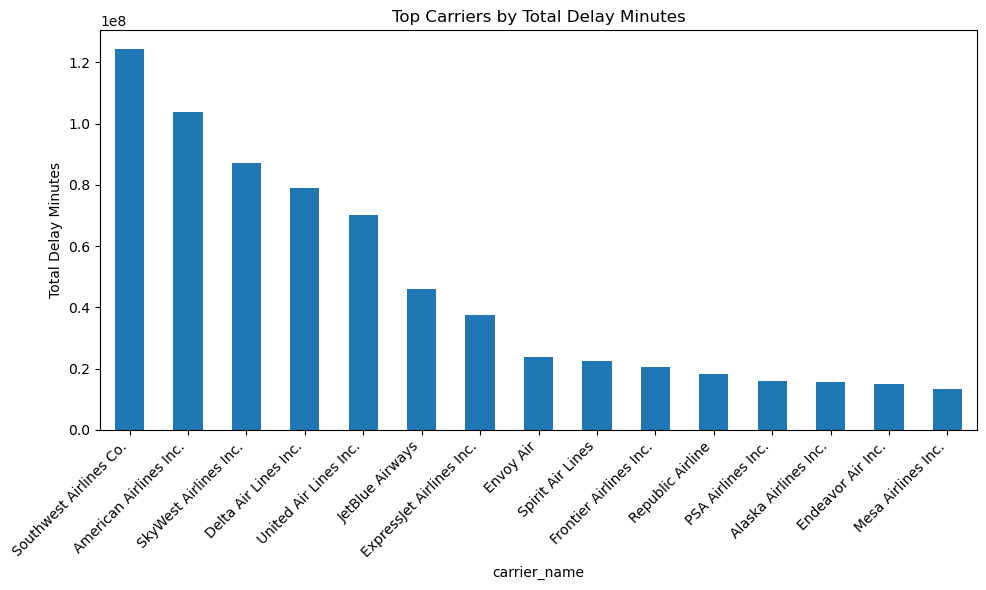

In [27]:
# Top carriers by total delay minutes
top_carriers_by_minutes = carrier_sig.sort_values("total_delay_min", ascending=False).head(15)
print("\nTop carriers by total delay minutes (min flights >= {MIN_FLIGHTS}):\n", top_carriers_by_minutes[["carrier", "carrier_name", "arr_flights", "total_delay_min"]])


plt.figure(figsize=(10, 6))
(top_carriers_by_minutes.set_index("carrier_name")["total_delay_min"]).plot(kind="bar")
plt.title("Top Carriers by Total Delay Minutes")
plt.ylabel("Total Delay Minutes")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

In [28]:
# 4) Airport-level analysis (where delays are most common)
print("\n4. Airport-level analysis – airports most delay-prone\n")


airport_grp = (
df.groupby(["airport", "airport_name"]).agg(
arr_flights=("arr_flights", "sum"),
arr_del15=("arr_del15", "sum"),
total_delay_min=("total_delay_min", "sum"),
)
).reset_index()


airport_grp["delay_rate"] = np.where(airport_grp["arr_flights"] > 0, airport_grp["arr_del15"] / airport_grp["arr_flights"], np.nan)
airport_grp


4. Airport-level analysis – airports most delay-prone



,airport,airport_name,arr_flights,arr_del15,total_delay_min,delay_rate
0,ABE,"Allentown/Bethlehem/Easton, PA: Lehigh Valley ...",34238.0,6124.0,402313.0,0.178866
1,ABI,"Abilene, TX: Abilene Regional",17870.0,3023.0,168737.0,0.169166
2,ABQ,"Albuquerque, NM: Albuquerque International Sun...",211162.0,42842.0,2258723.0,0.202887
3,ABR,"Aberdeen, SD: Aberdeen Regional",7435.0,773.0,63220.0,0.103968
4,ABY,"Albany, GA: Southwest Georgia Regional",9386.0,1450.0,95035.0,0.154485
...,...,...,...,...,...,...
410,XWA,"Williston, ND: Williston Basin International",4565.0,730.0,64245.0,0.159912
411,YAK,"Yakutat, AK: Yakutat Airport",7298.0,1007.0,47782.0,0.137983
412,YKM,"Yakima, WA: Yakima Air Terminal/McAllister Field",1366.0,179.0,7952.0,0.131040
413,YNG,"Youngstown/Warren, OH: Youngstown-Warren Regional",2.0,2.0,119.0,1.000000


In [29]:
# Filter to busy airports (e.g., >= 100k flights total)
MIN_AIRPORT_FLIGHTS = 100_000
airport_sig = airport_grp[airport_grp["arr_flights"] >= MIN_AIRPORT_FLIGHTS].copy()

In [30]:
# Top airports by delay rate
top_airports_by_rate = airport_sig.sort_values("delay_rate", ascending=False).head(15)
print("Top airports by delay rate (min flights >= {MIN_AIRPORT_FLIGHTS}):\n", top_airports_by_rate[["airport", "airport_name", "arr_flights", "delay_rate"]])

Top airports by delay rate (min flights >= {MIN_AIRPORT_FLIGHTS}):
     airport                                       airport_name  arr_flights  \
130     EWR           Newark, NJ: Newark Liberty International    1166485.0   
365     SJU       San Juan, PR: Luis Munoz Marin International     267274.0   
213     LAS            Las Vegas, NV: Harry Reid International     345860.0   
356     SFO     San Francisco, CA: San Francisco International    1501997.0   
294     PBI  West Palm Beach/Palm Beach, FL: Palm Beach Int...     237054.0   
225     LGA                            New York, NY: LaGuardia    1229776.0   
138     FLL  Fort Lauderdale, FL: Fort Lauderdale-Hollywood...     833738.0   
124     ELP                 El Paso, TX: El Paso International     147339.0   
204     JFK        New York, NY: John F. Kennedy International    1064227.0   
398     TYS                        Knoxville, TN: McGhee Tyson     113592.0   
239     MCO                 Orlando, FL: Orlando International 

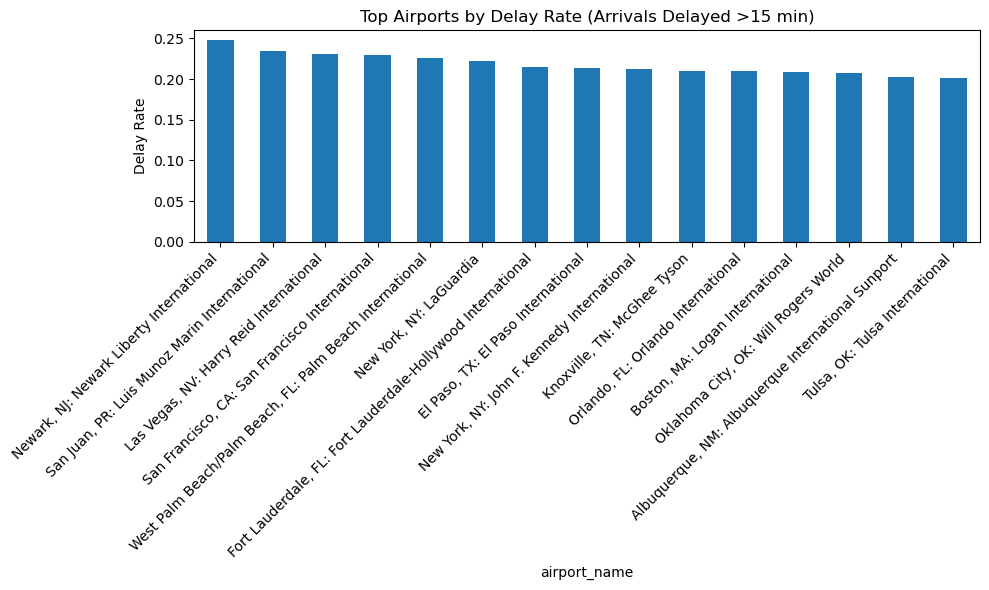

In [31]:
plt.figure(figsize=(10, 6))
(top_airports_by_rate.set_index("airport_name")["delay_rate"]).plot(kind="bar")
plt.title("Top Airports by Delay Rate (Arrivals Delayed >15 min)")
plt.ylabel("Delay Rate")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

# Predictive Model Training

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [33]:
df = df.dropna(subset=["arr_flights"])

In [34]:
fill_cols = [
"arr_del15", "carrier_ct", "weather_ct", "nas_ct", "security_ct", "late_aircraft_ct",
"arr_cancelled", "arr_diverted", "arr_delay", "carrier_delay", "weather_delay", "nas_delay",
"security_delay", "late_aircraft_delay"
]

In [35]:
df[fill_cols] = df[fill_cols].fillna(0)

In [36]:
# Derived target: delay_rate
df["delay_rate"] = np.where(df["arr_flights"] > 0, df["arr_del15"] / df["arr_flights"], 0)

In [37]:
# 1) Feature selection
features = [
"year", "month", "carrier", "airport", "arr_flights", "arr_cancelled", "arr_diverted",
"carrier_ct", "weather_ct", "nas_ct", "security_ct", "late_aircraft_ct",
"carrier_delay", "weather_delay", "nas_delay", "security_delay", "late_aircraft_delay"
]

In [38]:
X = df[features]
y = df["delay_rate"]

In [39]:
cat_features = ["carrier", "airport", "month", "year"]
num_features = [c for c in features if c not in cat_features]

In [40]:
# Preprocess: One-hot encode categoricals, passthrough numerics
preprocessor = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(handle_unknown="ignore", sparse_output=False), cat_features),
        ("num", "passthrough", num_features)
    ]
)

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [42]:
rf_model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("model", RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1))
])

rf_model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['carrier', 'airport',
                                                   'month', 'year']),
                                                 ('num', 'passthrough',
                                                  ['arr_flights',
                                                   'arr_cancelled',
                                                   'arr_diverted', 'carrier_ct',
                                                   'weather_ct', 'nas_ct',
                                                   'security_ct',
                                                   'late_aircraft_ct',
                                                   'carrier_delay',
                                                   'weather_delay', 'nas_delay',
                                                   'security_delay',
                                                   'late_aircraft_delay'])])),
                ('model', RandomForestRegressor(n_jobs=-1, random_state=42))])

In [44]:
# Extract feature names after preprocessing
cat_cols = rf_model.named_steps["preprocessor"].named_transformers_["cat"].get_feature_names_out(cat_features)
all_feature_names = list(cat_cols) + num_features

In [45]:
# Extract importances
importances = rf_model.named_steps["model"].feature_importances_
feat_importance = pd.Series(importances, index=all_feature_names).sort_values(ascending=False)

In [46]:
print("\nTop 20 Feature Importances:")
print(feat_importance.head(20))


Top 20 Feature Importances:
arr_flights            0.380064
late_aircraft_delay    0.190822
carrier_ct             0.149253
nas_ct                 0.123373
late_aircraft_ct       0.071537
nas_delay              0.037887
carrier_delay          0.022156
weather_ct             0.009781
weather_delay          0.005074
arr_cancelled          0.000898
security_delay         0.000470
year_2020              0.000396
security_ct            0.000355
arr_diverted           0.000327
year_2022              0.000200
month_3                0.000200
year_2013              0.000186
year_2019              0.000182
month_12               0.000181
year_2018              0.000178
dtype: float64


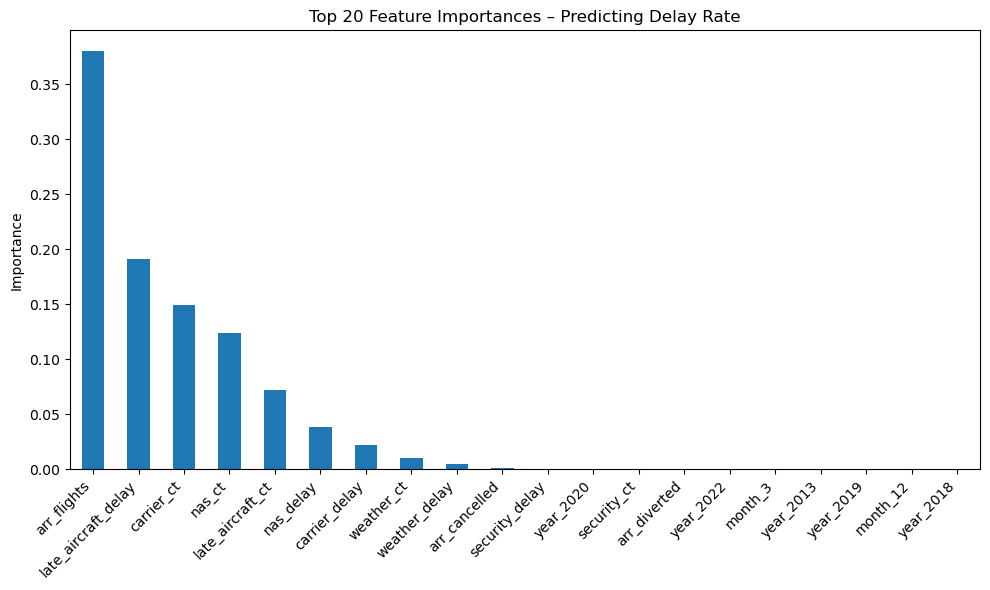

In [47]:
# Plot top 20 features
plt.figure(figsize=(10, 6))
feat_importance.head(20).plot(kind="bar")
plt.title("Top 20 Feature Importances – Predicting Delay Rate")
plt.ylabel("Importance")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

In [48]:
num_cols = [
"arr_flights", "arr_del15", "arr_cancelled", "arr_diverted",
"carrier_ct", "weather_ct", "nas_ct", "security_ct", "late_aircraft_ct",
"arr_delay", "carrier_delay", "weather_delay", "nas_delay", "security_delay", "late_aircraft_delay",
"delay_rate"
]

corr_matrix = df[num_cols].corr()

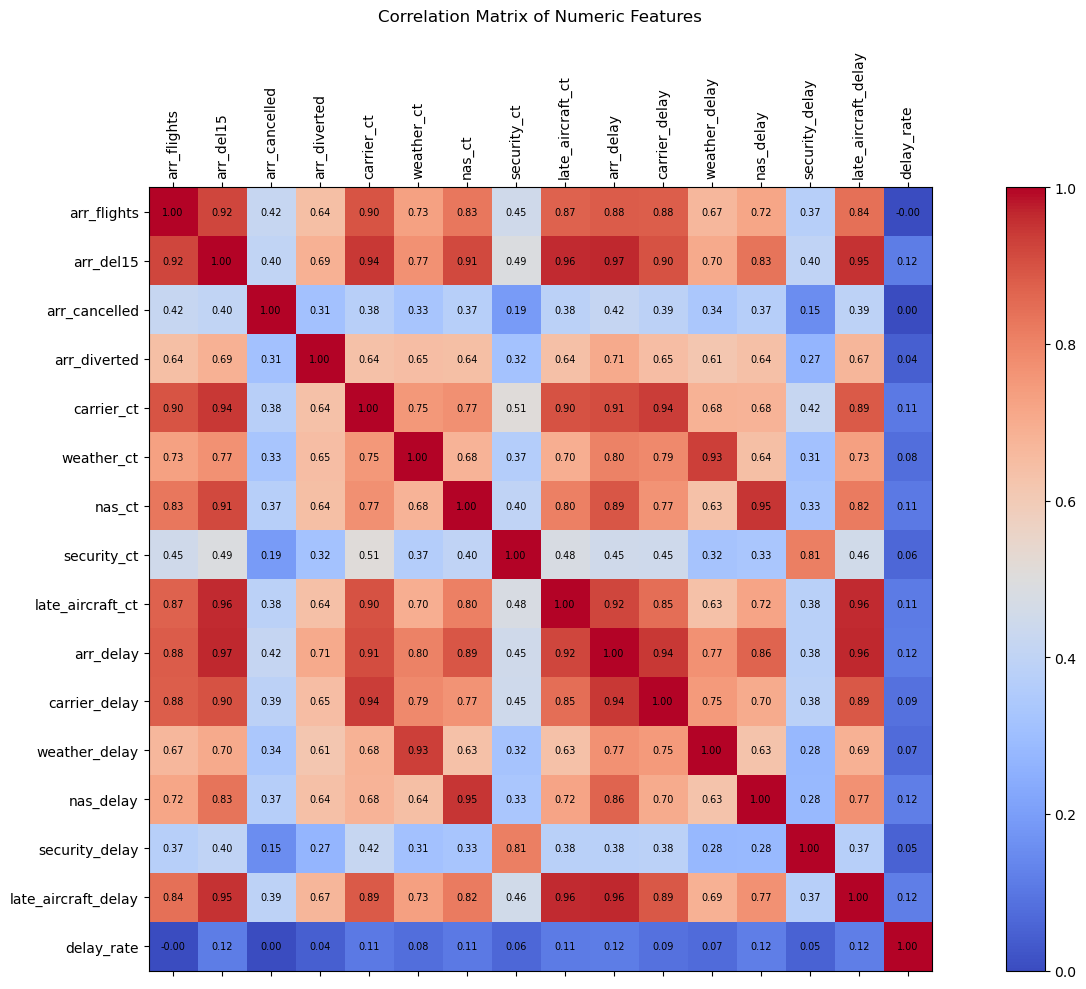

In [49]:
# Plot correlation heatmap with annotated values
fig, ax = plt.subplots(figsize=(15, 10))
cax = ax.matshow(corr_matrix, cmap="coolwarm")
plt.xticks(range(len(corr_matrix.columns)), corr_matrix.columns, rotation=90)
plt.yticks(range(len(corr_matrix.columns)), corr_matrix.columns)
plt.colorbar(cax)

for (i, j), val in np.ndenumerate(corr_matrix.values):
    ax.text(j, i, f"{val:.2f}", ha="center", va="center", color="black", fontsize=7)


plt.title("Correlation Matrix of Numeric Features", pad=20)
plt.tight_layout()
plt.show()

In [50]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor

In [51]:
models = {
"Linear Regression": LinearRegression(),
"Gradient Boosting": GradientBoostingRegressor(random_state=42)
}

In [52]:
results = {}

# Train & Evaluate
for name, model in models.items():
    pipe = Pipeline(steps=[("preprocessor", preprocessor), ("model", model)])
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    results[name] = {"R2": r2, "RMSE": rmse}
    print(f"{name}: R2_score={r2:.3f}, RMSE={rmse:.4f}")

Linear Regression: R2_score=0.282, RMSE=0.0945
Gradient Boosting: R2_score=0.857, RMSE=0.0422


In [53]:
y_pred = rf_model.predict(X_test)
r2 = r2_score(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

print("Model Performance:")
print(f"R2_score: {r2:.3f}")
print(f"RMSE: {rmse:.4f}")

Model Performance:
R2_score: 0.977
RMSE: 0.0168


## Understanding XGBoost in Flight Delay Prediction  

Flight delays are influenced by many **non-linear and interacting factors** such as weather conditions, airline operations, airport congestion, and late-arriving aircraft. Traditional models like **Linear Regression** struggle because they assume a strictly linear relationship. On the other hand, **Random Forests** can capture complex patterns very well, but they often risk **overfitting**, especially when training data is not fully representative of future scenarios.  

**XGBoost (Extreme Gradient Boosting)** provides a balanced alternative. It is a tree-based ensemble method like Random Forest, but with additional features that make it more robust:  

- **Regularization (L1 & L2 penalties):** Helps control overfitting by penalizing overly complex models.  
- **Boosting approach:** Builds trees sequentially, each correcting the errors of the previous ones, which improves accuracy over bagging methods like Random Forest.  
- **Hyperparameter control:** Parameters such as learning rate, maximum depth, and subsampling make the model tunable for performance vs. generalization.  
- **Efficiency:** XGBoost is optimized for speed and scalability, making it suitable for large aviation datasets.  

---

## Conclusion  

We selected **XGBoost** for flight delay prediction because it provides the best trade-off between **model complexity and generalization**. Unlike Linear Regression, it captures the **non-linear relationships** between different delay causes, and compared to Random Forest, it **avoids overfitting** through strong regularization.  

This makes XGBoost particularly well-suited for aviation data, where delay patterns vary over time, airports, and carriers. It ensures our model is not just highly accurate on historical data, but also **reliable for predicting future flight delays**.  